In [147]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from scipy import stats 
from tensorflow.keras import Sequential,layers
from sklearn.metrics import accuracy_score,confusion_matrix,accuracy_score

In [2]:
%matplotlib inline

# Loading dataset 

In [5]:
df_all =pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.csv',header=None)

/home/anish/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_all.head()

0        1             2         3          4         5   6    7   8   \
0  33.0  Jogging  4.910596e+13 -0.694638  12.680544  0.503953 NaN  NaN NaN   
1  33.0  Jogging  4.910606e+13  5.012288  11.264028  0.953424 NaN  NaN NaN   
2  33.0  Jogging  4.910611e+13  4.903325  10.882658 -0.081722 NaN  NaN NaN   
3  33.0  Jogging  4.910622e+13 -0.612916  18.496431  3.023717 NaN  NaN NaN   
4  33.0  Jogging  4.910633e+13 -1.184970  12.108489  7.205164 NaN  NaN NaN   

   9   10  11  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN

In [7]:
df_all.columns=['user_id','activity','timestamp','x_axis','y_axis','z_axis','a','b','c','d','e','f']

In [8]:
df_all.head()

user_id activity     timestamp    x_axis     y_axis    z_axis   a    b   c  \
0     33.0  Jogging  4.910596e+13 -0.694638  12.680544  0.503953 NaN  NaN NaN   
1     33.0  Jogging  4.910606e+13  5.012288  11.264028  0.953424 NaN  NaN NaN   
2     33.0  Jogging  4.910611e+13  4.903325  10.882658 -0.081722 NaN  NaN NaN   
3     33.0  Jogging  4.910622e+13 -0.612916  18.496431  3.023717 NaN  NaN NaN   
4     33.0  Jogging  4.910633e+13 -1.184970  12.108489  7.205164 NaN  NaN NaN   

    d   e   f  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN

In [9]:
df_all.shape

(1048576, 12)

# Dropping and placing the missing values 

In [10]:
df_all.isnull().sum()

user_id            5
activity           5
timestamp          5
x_axis             5
y_axis             5
z_axis             6
a            1048571
b            1048571
c            1048571
d            1048571
e            1048571
f            1048571
dtype: int64

 Since almost all the columns is empty and doesnot have any relevant information hence we are removing a,b,c,d,e,f 

In [11]:
df_all.drop(labels=['a','b','c','d','e','f'],axis=1,inplace=True)

In [12]:
df_all.head()

user_id activity     timestamp    x_axis     y_axis    z_axis
0     33.0  Jogging  4.910596e+13 -0.694638  12.680544  0.503953
1     33.0  Jogging  4.910606e+13  5.012288  11.264028  0.953424
2     33.0  Jogging  4.910611e+13  4.903325  10.882658 -0.081722
3     33.0  Jogging  4.910622e+13 -0.612916  18.496431  3.023717
4     33.0  Jogging  4.910633e+13 -1.184970  12.108489  7.205164

In [13]:
def null_count(df):
    missing_data = df.isnull().sum()
    missing_data =missing_data[missing_data>0].sort_values(ascending = False)
    percentage_of_null =missing_data*100/len(df)
    features_index = missing_data.index
    values =list(missing_data)
    percent_values = list(percentage_of_null)
    val_df =pd.DataFrame(data=values,index=features_index,columns=['null_count'])
    val_df['Null_percent'] = percent_values
    plt.figure(figsize=(10,10))
    sns.barplot(x=features_index,y=val_df['null_count'])
    plt.title("Total missing value by columns")
    return plt,val_df

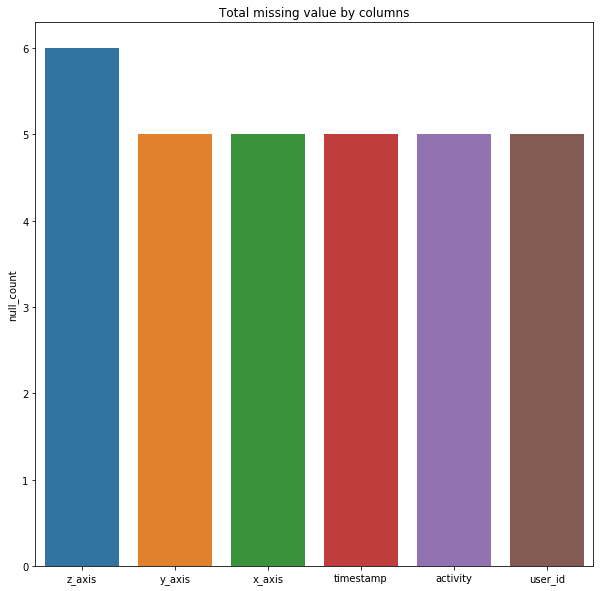

In [14]:
plt,val =null_count(df_all)

In [15]:
val

null_count  Null_percent
z_axis              6      0.000572
y_axis              5      0.000477
x_axis              5      0.000477
timestamp           5      0.000477
activity            5      0.000477
user_id             5      0.000477

In [16]:
df_all[(df_all['z_axis'].isnull())]

user_id activity     timestamp  x_axis  y_axis  z_axis
281873      NaN      NaN           NaN     NaN     NaN     NaN
281874      NaN      NaN           NaN     NaN     NaN     NaN
281875      NaN      NaN           NaN     NaN     NaN     NaN
343419     11.0  Walking  1.867172e+12     4.4     4.4     NaN
537501      NaN      NaN           NaN     NaN     NaN     NaN
832901      NaN      NaN           NaN     NaN     NaN     NaN

Since  index 281873,281874,281875,537501,832901,343419 doesnot have a single value and hence removing those value 

In [17]:
 df_all =df_all.drop([281873,281874,281875,537501,832901,343419])

In [18]:
df_all.isnull().sum()

user_id      0
activity     0
timestamp    0
x_axis       0
y_axis       0
z_axis       0
dtype: int64

In [19]:
def outlier(df,n,features):
    outlier_indices=[]
    
    for col in features:
        #1st quartile(25%)
        Q1 = np.percentile(df[col],25)
        #3rd quartile(75%)
        Q3 = np.percentile(df[col],75)
        #InterQuatile Range
        IQR=Q3-Q1
        
        outlier_border =IQR*1.5
        #determinining outlier columns
        outlier_column_list =df[(df[col]<Q1-outlier_border)|(df[col]>Q3+outlier_border)].index
        outlier_indices.extend(outlier_column_list)
    outlier_indices = Counter(outlier_indices)
    multiple_outlier = list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outlier

In [20]:
outlier_to_drop =outlier(df_all,3,['user_id','timestamp','x_axis','y_axis','z_axis'])

In [21]:
len(outlier_to_drop)

274

There is 274 outlier in the dataset

In [22]:
df_all = df_all.drop(outlier_to_drop,axis=0)

# EDA of Human Activity recognition 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

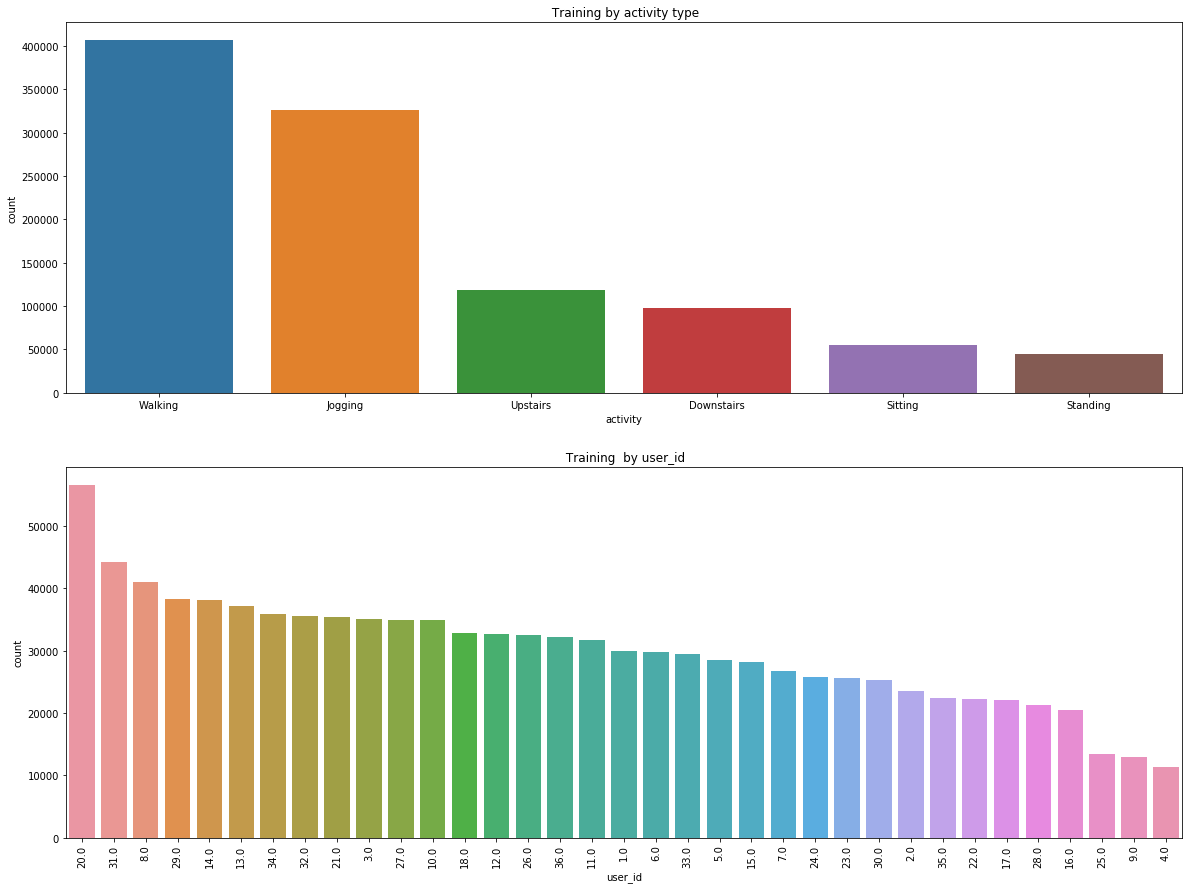

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.countplot(x='activity',data=df_all, order = df_all['activity'].value_counts().index)
plt.title(" Training by activity type")
plt.subplot(2,1,2)
sns.countplot(x='user_id',data=df_all,order = df_all['user_id'].value_counts().index)
plt.title(" Training  by user_id")
plt.xticks(rotation =90)

In [24]:
def accelerometer_plot(df,activity,tot_row):
    
    df = df[(df['activity']==activity)][:tot_row]
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plt.title('X_axis '+activity+' plot')
    plt.ylim([-20,20])
    plt.xlim([min(df['timestamp']),max(df['timestamp'])])
    plt.grid(True)
    plt.plot(df['timestamp'],df['x_axis'],color='red')
    plt.xticks(())
    
    plt.subplot(1,3,2)
    plt.title('Y_axis '+activity+' plot')
    plt.ylim([-20,20])
    plt.xlim([min(df['timestamp']),max(df['timestamp'])])
    plt.grid(True)
    plt.plot(df['timestamp'],df['y_axis'],color='blue')
    plt.xticks(())
    
    plt.subplot(1,3,3)
    plt.title('Z_axis '+activity+' plot')
    plt.ylim([-20,20])
    plt.xlim([min(df['timestamp']),max(df['timestamp'])])
    plt.grid(True)
    plt.plot(df['timestamp'],df['z_axis'],color='green')
    plt.xticks(())
    

In [25]:
activity_col = df_all['activity'].unique()

In [26]:
activity_col

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

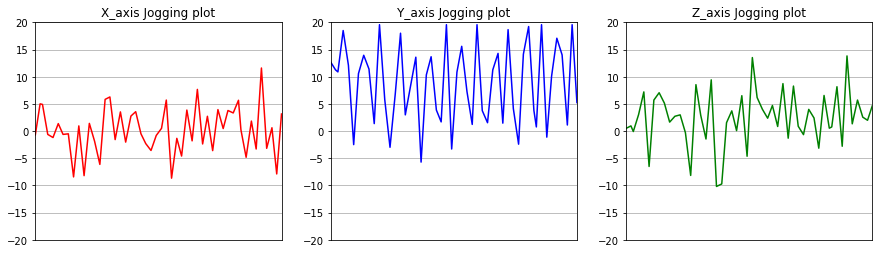

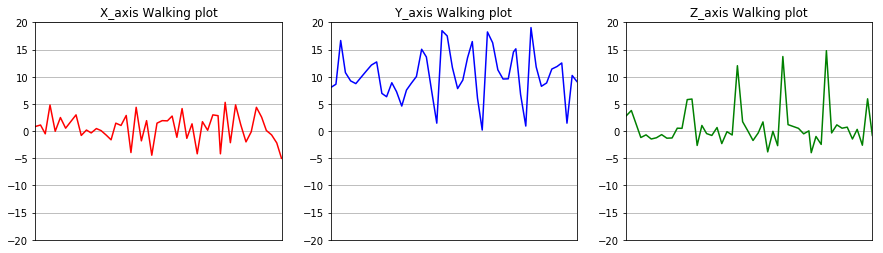

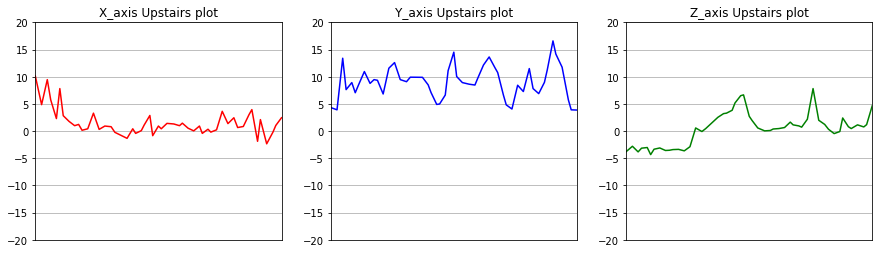

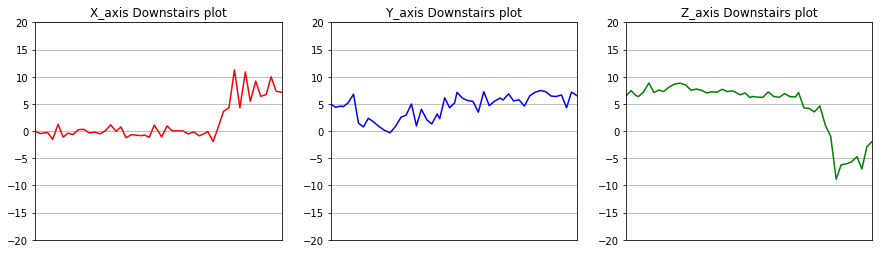

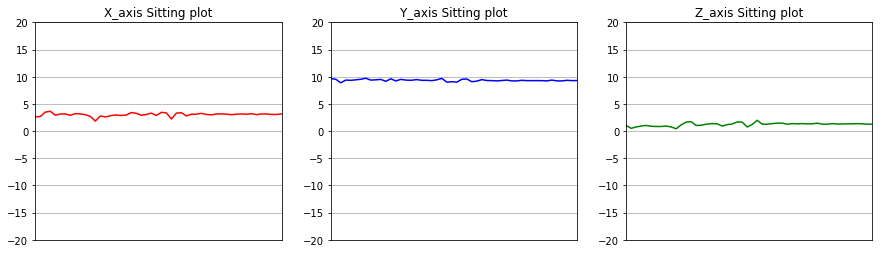

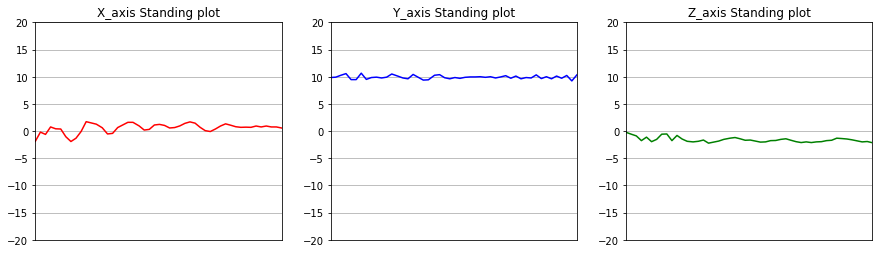

In [27]:
for i in activity_col:
    accelerometer_plot(df_all,i,50)

In [28]:
activity_col =list(activity_col)
colors =['red','green','blue','yellow','black','orange']

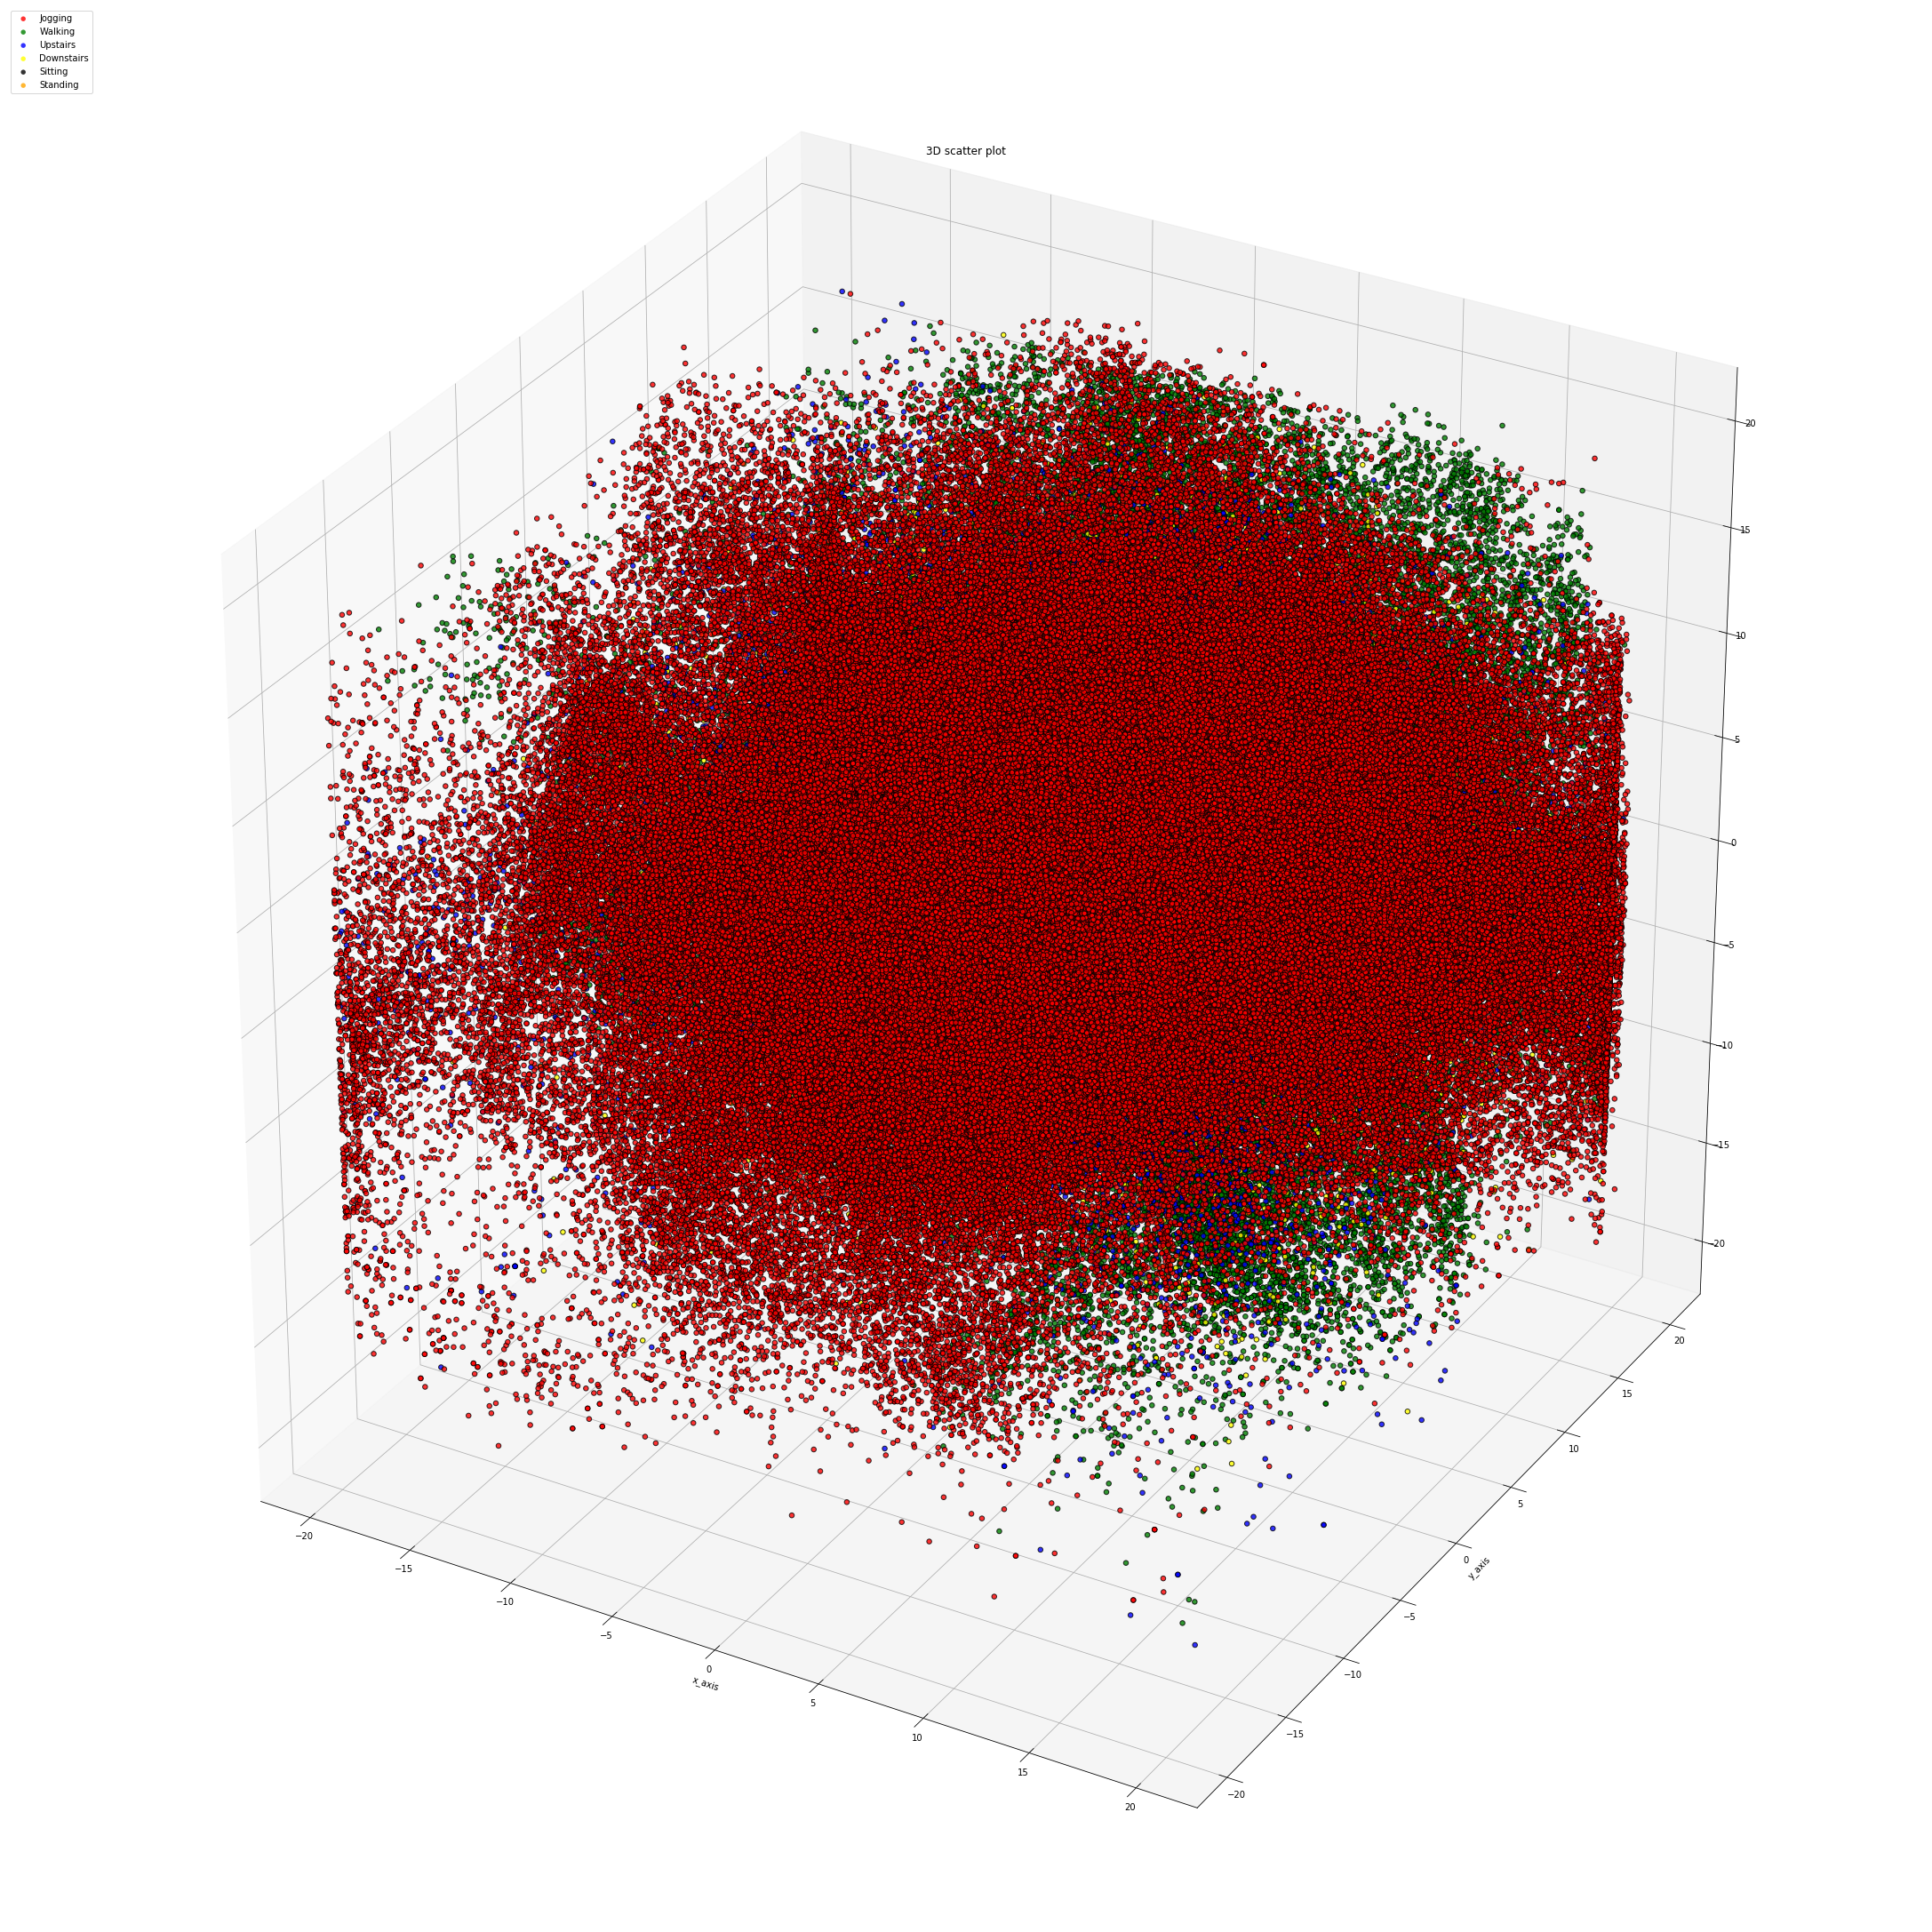

In [29]:
fig = plt.figure(figsize=(30,30))
ax = Axes3D(fig)

for i in range(len(colors)): 
    ax.scatter(xs= df_all[(df_all['activity']==activity_col[i])]['x_axis'],
                   ys= df_all[(df_all['activity']==activity_col[i])]['y_axis'], 
                   zs=df_all[(df_all['activity']==activity_col[i])]['z_axis'], alpha=0.8, c=str(colors[i]),
                   edgecolors='none', s=30, label= str(activity_col[i]))

plt.title('3D scatter plot')
plt.legend(loc=2)
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.show()

Text(0.5, 1.0, 'Boxplot of z_axis')

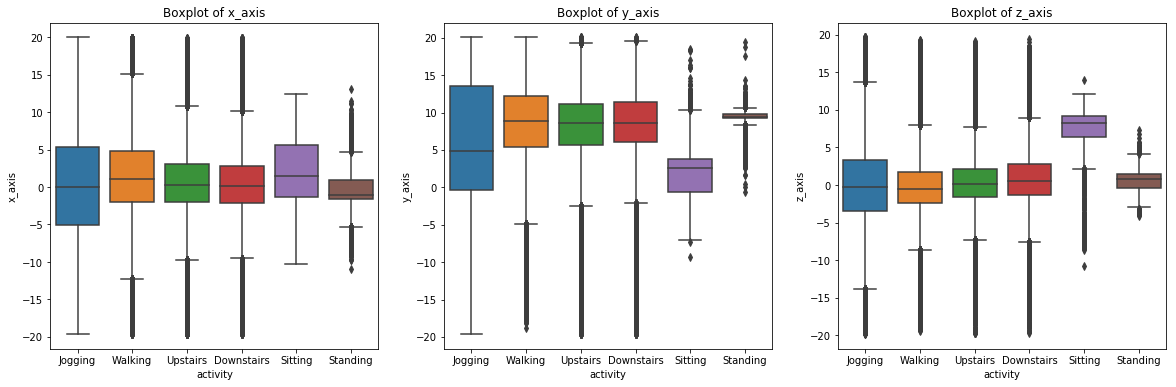

In [37]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(y='x_axis', x='activity', data =df_all)
plt.title("Boxplot of x_axis")
plt.subplot(1,3,2)
sns.boxplot(y='y_axis', x='activity', data =df_all)
plt.title("Boxplot of y_axis")
plt.subplot(1,3,3)
sns.boxplot(y='z_axis', x='activity', data =df_all)
plt.title("Boxplot of z_axis")

There is a higher acceration for task like jogging and walking where as   standing has very less accerations

# Processing date time from timestamp

In [38]:
def date_processing(df,label):
    data = pd.to_datetime(df_all['timestamp'])
    df['year'] = pd.DatetimeIndex(data).year
    df['month'] = pd.DatetimeIndex(data).month
    df['week'] = pd.DatetimeIndex(data).week
    df['day'] = pd.DatetimeIndex(data).day
    df['dayofweek']=pd.DatetimeIndex(data).dayofweek
    df['dayofyear'] = pd.DatetimeIndex(data).dayofyear
    df['is_month_end'] = pd.DatetimeIndex(data).is_month_end
    df['is_month_start'] = pd.DatetimeIndex(data).is_month_start
    df['is_quarter_end'] = pd.DatetimeIndex(data).is_quarter_end
    df['is_quater_start'] = pd.DatetimeIndex(data).is_quarter_start
    df['is_year_end'] = pd.DatetimeIndex(data).is_year_end
    df['is_year_start'] = pd.DatetimeIndex(data).is_year_start

In [39]:
date_processing(df_all,'timestamp')

In [40]:
df_all.columns

Index(['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis',
       'year', 'month', 'week', 'day', 'dayofweek', 'dayofyear',
       'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quater_start',
       'is_year_end', 'is_year_start'],
      dtype='object')

In [41]:
df_all.shape

(1048296, 18)

In [42]:
def unique(df,label):
    for i in label:
        print(i,df[i].unique())

In [43]:
unique(df_all,label=['year', 'month', 'week', 'day', 'dayofweek', 'dayofyear',
                     'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quater_start',
       'is_year_end', 'is_year_start'])

year [1970]
month [1]
week [1]
day [1 2 3]
dayofweek [3 4 5]
dayofyear [1 2 3]
is_month_end [False]
is_month_start [ True False]
is_quarter_end [False]
is_quater_start [ True False]
is_year_end [False]
is_year_start [ True False]


Since year,month,week,is_month_end,is_quater_end,is_year_end has a single unique value hence removing those items from the dataframe 

In [44]:
df_all.drop(labels=['year','month','week','is_month_end','is_quarter_end','is_year_end'],axis=1,inplace=True)

Again we see that day,day of the year,day of the month  resembles the same data hence we are dropping the any of the two data. 

In [45]:
df_all.drop(labels=['dayofweek','dayofyear'],axis=1,inplace=True)

since is_month_start,is_quarter_start,is_year_start are highly correlated value as they dipict the same information.Hence we are dropping any two of them  

In [46]:
df_all.drop(labels=['is_month_start','is_quater_start'],axis=1,inplace=True)

In [47]:
df_all.shape

(1048296, 8)

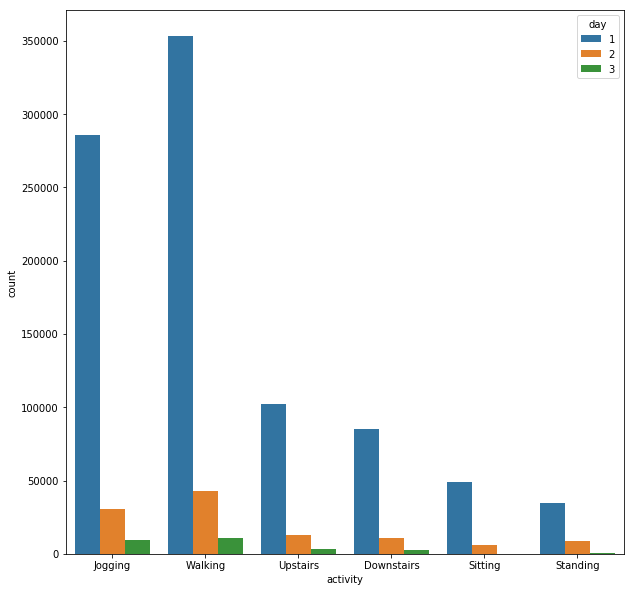

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(x='activity',hue='day',data=df_all)

In [49]:
df_all.columns

Index(['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis', 'day',
       'is_year_start'],
      dtype='object')

In [50]:
unique(df_all,['day','is_year_start'])

day [1 2 3]
is_year_start [ True False]


In [51]:
df_all.shape

(1048296, 8)

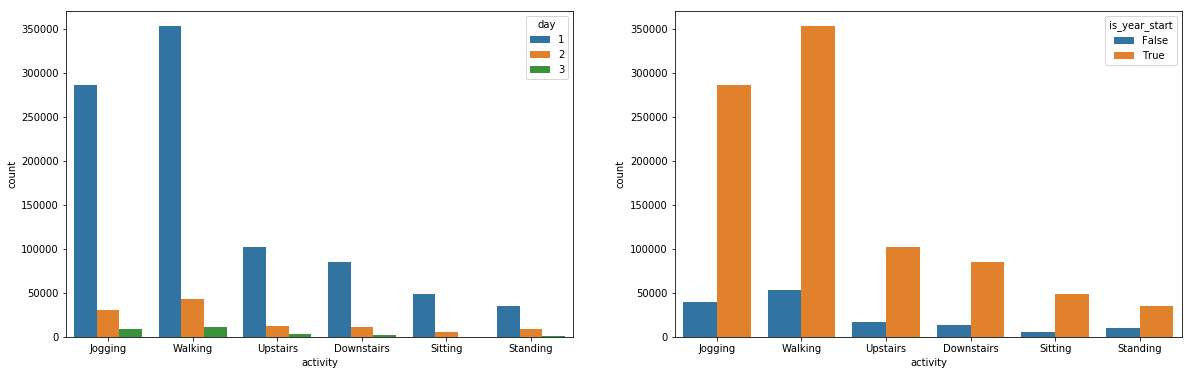

In [52]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='activity',hue='day',data=df_all)
plt.subplot(1,2,2)
sns.countplot(x='activity',hue='is_year_start',data=df_all)

Most of the do any of the pysical activity on the 1st day of week  and phtysical activity decrease as days changes 

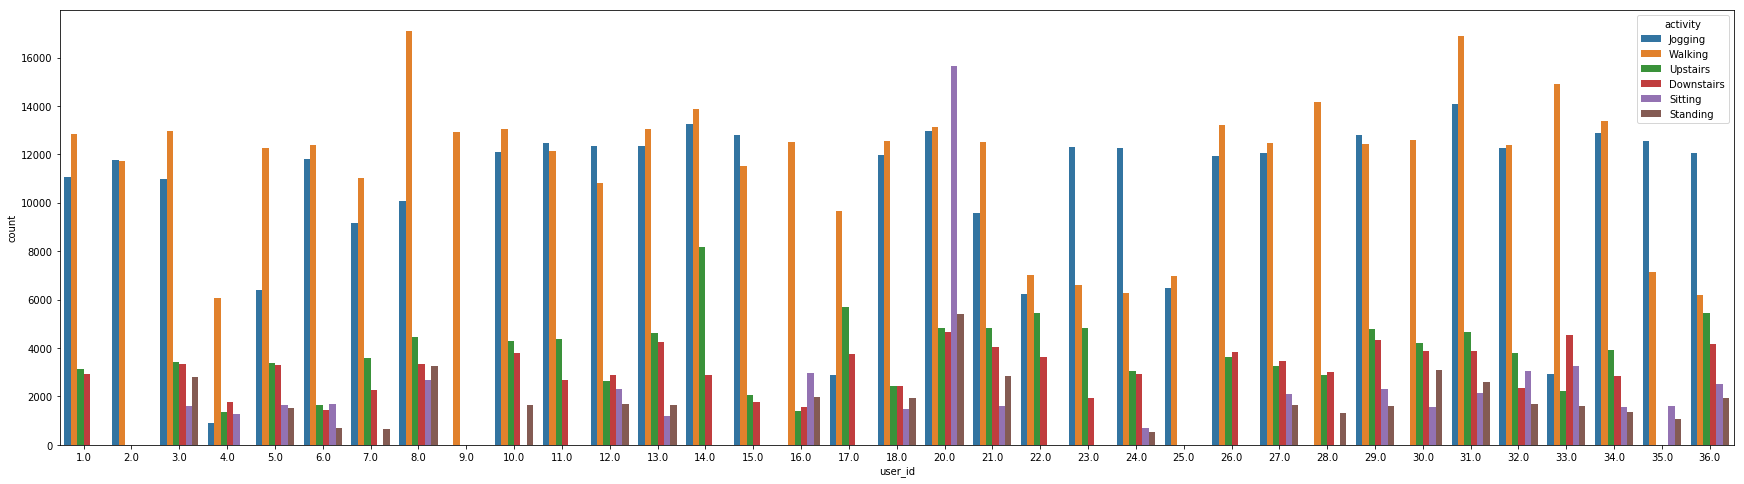

In [53]:
plt.figure(figsize=(30,8))
sns.countplot(x='user_id',hue='activity',data=df_all)

Most of the user do walking reguraly and we can see in many user behaviour where walking and jogging is same.There is an anomaly in user_id who sit alot  

# Encoding and correlations 

In [54]:
le =LabelEncoder()
df_all['en_activity']=le.fit_transform(df_all['activity'])

Note:
1. Downstairs  = 0
2. Jogging     = 1 
3. Sitting     = 2
4. Standing    = 3
5. Upstairs    = 4
6. Walking     = 5


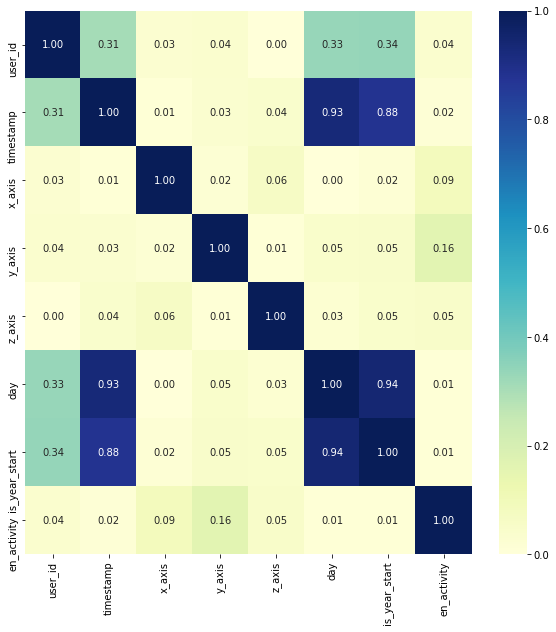

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df_all.corr()),annot=True,fmt ='0.2f',cmap="YlGnBu")

For the activity ,nothing is highly correlated but timestamp is highly correlated with day and the start of the year 

In [56]:
df_all = pd.concat(objs=[df_all,pd.get_dummies(df_all['day'],prefix='day',drop_first=True)],axis=1)

In [57]:
df_all = pd.concat(objs=[df_all,pd.get_dummies(df_all['is_year_start'] ,
                                               prefix='year_start',drop_first=True)],axis=1)

In [58]:
df_all.head()

user_id activity     timestamp    x_axis     y_axis    z_axis  day  \
0     33.0  Jogging  4.910596e+13 -0.694638  12.680544  0.503953    1   
1     33.0  Jogging  4.910606e+13  5.012288  11.264028  0.953424    1   
2     33.0  Jogging  4.910611e+13  4.903325  10.882658 -0.081722    1   
3     33.0  Jogging  4.910622e+13 -0.612916  18.496431  3.023717    1   
4     33.0  Jogging  4.910633e+13 -1.184970  12.108489  7.205164    1   

   is_year_start  en_activity  day_2  day_3  year_start_True  
0           True            1      0      0                1  
1           True            1      0      0                1  
2           True            1      0      0                1  
3           True            1      0      0                1  
4           True            1      0      0                1

 dropping the unrequired columns 

In [59]:
df_all.drop(labels=['activity','is_year_start','day'],axis=1,inplace=True)

In [60]:
df_all.drop(labels=['timestamp'],axis=1,inplace=True)

In [61]:
df_all.head()

user_id    x_axis     y_axis    z_axis  en_activity  day_2  day_3  \
0     33.0 -0.694638  12.680544  0.503953            1      0      0   
1     33.0  5.012288  11.264028  0.953424            1      0      0   
2     33.0  4.903325  10.882658 -0.081722            1      0      0   
3     33.0 -0.612916  18.496431  3.023717            1      0      0   
4     33.0 -1.184970  12.108489  7.205164            1      0      0   

   year_start_True  
0                1  
1                1  
2                1  
3                1  
4                1

# data normalization 

In [62]:
norm = StandardScaler()

In [63]:
norm_col =['x_axis', 'y_axis', 'z_axis', 'day_2','day_3', 'year_start_True']

In [64]:
norm_df =pd.DataFrame(norm.fit_transform(df_all[norm_col]),columns=norm_col)

In [65]:
norm_df.head()

x_axis    y_axis    z_axis     day_2     day_3  year_start_True
0 -0.222479  0.792548  0.015278 -0.345016 -0.161718         0.389728
1  0.625802  0.580498  0.109117 -0.345016 -0.161718         0.389728
2  0.609605  0.523408 -0.106997 -0.345016 -0.161718         0.389728
3 -0.210332  1.663177  0.541345 -0.345016 -0.161718         0.389728
4 -0.295362  0.706913  1.414333 -0.345016 -0.161718         0.389728

In [66]:
norm_df['user_id'] = df_all['user_id']
norm_df['en_activity'] = df_all['en_activity']

In [67]:
norm_df.head()

x_axis    y_axis    z_axis     day_2     day_3  year_start_True  user_id  \
0 -0.222479  0.792548  0.015278 -0.345016 -0.161718         0.389728     33.0   
1  0.625802  0.580498  0.109117 -0.345016 -0.161718         0.389728     33.0   
2  0.609605  0.523408 -0.106997 -0.345016 -0.161718         0.389728     33.0   
3 -0.210332  1.663177  0.541345 -0.345016 -0.161718         0.389728     33.0   
4 -0.295362  0.706913  1.414333 -0.345016 -0.161718         0.389728     33.0   

   en_activity  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

#  data splitting 

Since the data contain the timestamp hence for the better result we have to divide the dataset in such a proportion that every aspect is mentioned in the data set 

In [68]:
norm_df['user_id'].unique()

array([33., 17., 20., 29., 13., 15.,  6., 27., 36., 18., nan, 32., 35.,
       11., 16.,  5., 10., 28., 26., 14., 24., 12., 23.,  4., 30., 34.,
        8., 31., 21.,  3., 22.,  1.,  9., 25.,  2.,  7.])

In [69]:
# Differentiate between test set and training set
df_test = norm_df[norm_df['user_id'] > 29]
df_train = norm_df[norm_df['user_id'] <= 29]

#  Model tuning and prediction using Keras

In [70]:
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40

In [71]:
norm_df.columns

Index(['x_axis', 'y_axis', 'z_axis', 'day_2', 'day_3', 'year_start_True',
       'user_id', 'en_activity'],
      dtype='object')

In [72]:
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 6
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['x_axis'].values[i: i + time_steps]
        ys = df['y_axis'].values[i: i + time_steps]
        zs = df['z_axis'].values[i: i + time_steps]
        day2_s = df['day_2'].values[i: i + time_steps]
        day3_s = df['day_3'].values[i: i + time_steps]
        year_start_s= df['year_start_True'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs,day2_s,day3_s,year_start_s])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels


In [122]:
x_train, y_train = create_segments_and_labels(df_train,TIME_PERIODS,STEP_DISTANCE,'en_activity')

In [114]:
x_train.shape,y_train.shape

((20569, 80, 6), (20569,))

In [115]:
x,y,z=x_train.shape

In [116]:
x_train=x_train.reshape(x,y*z)

In [117]:
x_train.shape

(20569, 480)

# Keras Neural Network

In [118]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(layers.Reshape((TIME_PERIODS, 6), input_shape=(80*6,)))
model_m.add(layers.Dense(100, activation='relu'))
#model_m.add(layers.Dropout(0.1))
model_m.add(layers.Dense(100, activation='relu'))
#model_m.add(layers.Dropout(0.1))
model_m.add(layers.Dense(100, activation='relu'))
model_m.add(layers.Flatten())
model_m.add(layers.Dense(6, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 80, 6)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 80, 100)           700       
_________________________________________________________________
dense_28 (Dense)             (None, 80, 100)           10100     
_________________________________________________________________
dense_29 (Dense)             (None, 80, 100)           10100     
_________________________________________________________________
flatten_8 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 48006     
Total params: 68,906
Trainable params: 68,906
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
model_m.compile(loss='sparse_categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])

In [120]:
result=model_m.fit(x_train,y_train,batch_size=400,epochs=20,validation_split=0.2)

Train on 16455 samples, validate on 4114 samples
Epoch 1/20
16455/16455 [==============================] - 4s 234us/step - loss: 0.9659 - acc: 0.6577 - val_loss: 1.5405 - val_acc: 0.6211
Epoch 2/20
16455/16455 [==============================] - 3s 210us/step - loss: 0.5343 - acc: 0.8081 - val_loss: 1.8829 - val_acc: 0.6665
Epoch 3/20
16455/16455 [==============================] - 3s 211us/step - loss: 0.4725 - acc: 0.8352 - val_loss: 1.8048 - val_acc: 0.6908
Epoch 4/20
16455/16455 [==============================] - 3s 211us/step - loss: 0.4398 - acc: 0.8466 - val_loss: 1.7620 - val_acc: 0.6745
Epoch 5/20
16455/16455 [==============================] - 3s 212us/step - loss: 0.4066 - acc: 0.8597 - val_loss: 1.8194 - val_acc: 0.6723
Epoch 6/20
16455/16455 [==============================] - 3s 211us/step - loss: 0.3625 - acc: 0.8804 - val_loss: 2.0186 - val_acc: 0.6213
Epoch 7/20
16455/16455 [==============================] - 4s 213us/step - loss: 0.3363 - acc: 0.8886 - val_loss: 1.9098 - v

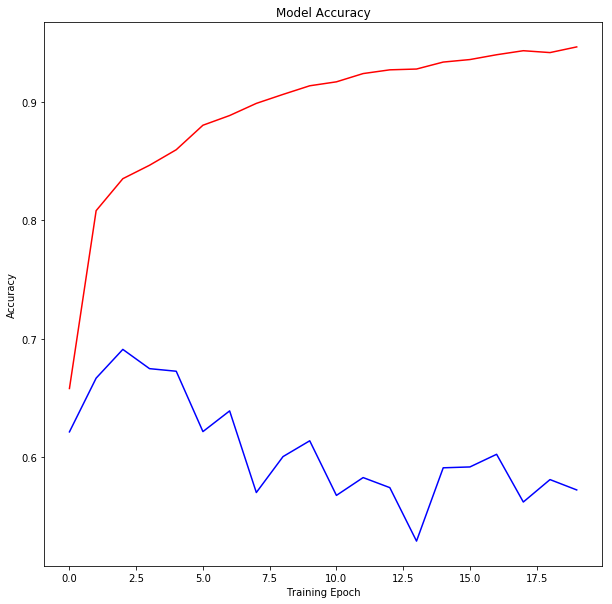

In [121]:
plt.figure(figsize=(10, 10))
plt.plot(result.history['acc'], 'r', label='Accuracy of training data')
plt.plot(result.history['val_acc'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.show()

In [123]:
x_test,y_test = create_segments_and_labels(df_test,TIME_PERIODS,STEP_DISTANCE,'en_activity')

In [125]:
x_test.shape

(5628, 80, 6)

In [127]:
x_test =x_test.reshape(5628,80*6)

In [135]:
y_test_pred =model_m.predict(x_test,batch_size=400)

In [145]:
y_test_pred =np.argmax(y_test_pred,axis=1)

In [148]:
accuracy_score(y_test,y_test_pred)

0.7874911158493249

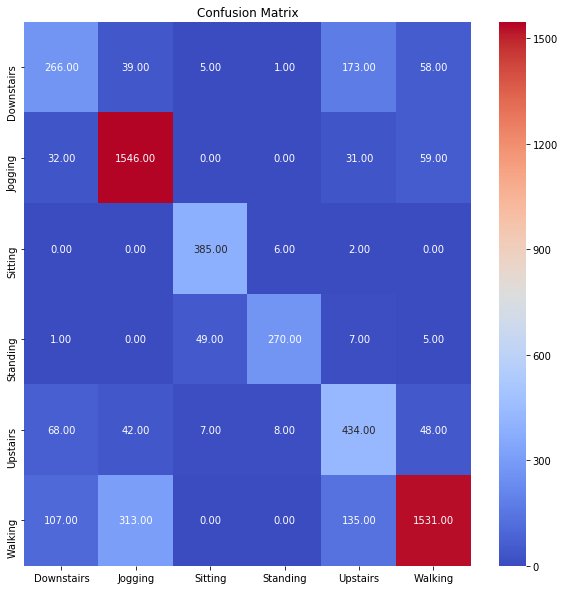

In [159]:
plt.figure(figsize=(10,10))
label_type =['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='0.2f',
            xticklabels=label_type,yticklabels=label_type,cmap='coolwarm')


# Summary:

1. Importing required libraries.
2. Loading Dataset.
3. Dropping missing values and outliers.
4. Exploratory Data analysis of  data set.
5. There is a higher acceration for task like jogging and walking where as  standing has very less accerations.
6. Extracting date time from timestamp.
7. Since year,month,week,is_month_end,is_quater_end,is_year_end has a single unique value hence removing those    items from the dataframe.
8. Again we see that day,day of the year,day of the month  resembles the same data hence we are dropping the any of the two data. 
9. Since is_month_start,is_quarter_start,is_year_start are highly correlated value as they dipict the same information.Hence we are dropping any two of them.
10. Most of the do any of the pysical activity on the 1st day of week  and phtysical activity decrease as days changes.
11. For the activity ,nothing is highly correlated but timestamp is highly correlated with day and the start of the year.
12. Most of the user do walking reguraly and we can see in many user behaviour where walking and jogging is same.There is an anomaly in user_id who sit alot.
13. Normalizing the dataset.
14. Splitting the data set.
15. Since the data is higly related to time series hence taking the pocket of data into segments and tuning with the keras model.
16. We found out 0.78 accuracy in test set.